In [1]:
%pylab inline
import numpy as np
from sklearn import neighbors
from sklearn.cluster import KMeans
from numpy import genfromtxt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [2]:
TRAIN_TEST_RATIO = 4

## Get data

In [3]:
people_data = genfromtxt('people.txt',delimiter = ',')
item_data = genfromtxt('item.txt',delimiter = ',')
none_data = genfromtxt('none.txt',delimiter = ',')
data = np.concatenate((people_data,item_data,none_data),axis=0)
label = np.array([2] * len(people_data) + [1] * len(item_data) + [0] * len(none_data))
data = np.log(data+1) #some data will be extreamly large, we use log function to map them into a small space

## Get training and test dataset

In [4]:
people_test = data[label==2][:len(people_data)//TRAIN_TEST_RATIO]
people_train = data[label==2][len(people_data)//TRAIN_TEST_RATIO:]
item_test = data[label==1][:len(item_data)//TRAIN_TEST_RATIO]
item_train = data[label==1][len(item_data)//TRAIN_TEST_RATIO:]
none_test = data[label==0][:len(none_data)//TRAIN_TEST_RATIO]
none_train = data[label==0][len(none_data)//TRAIN_TEST_RATIO:]

train_data = np.concatenate((people_train,item_train,none_train),axis=0)
test_data = np.concatenate((people_test,item_test,none_test),axis=0)

train_label = [2] * len(people_train) + [1] * len(item_train) + [0] * len(none_train)
test_label = [2] * len(people_test) + [1] * len(item_test) + [0] * len(none_test)
train_label = np.array(train_label)
test_label = np.array(test_label)

## Normalize data

In [5]:
#normalize the data
ftsclr=StandardScaler()
train_data = ftsclr.fit_transform(train_data)
test_data = ftsclr.transform(test_data)

## Get PCA data

In [6]:
# tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
# data_tsne = tsne.fit_transform(data)

pca = PCA(n_components=2)
pca_train_data = pca.fit_transform(train_data)
pca_test_data = pca.transform(test_data)

## Print data size

In [7]:
print ("people data size:", np.shape(people_data))
print ("item data size:", np.shape(item_data))
print ("none data size:", np.shape(none_data))
print("train data size:", np.shape(train_data))
print ("train label size:",np.shape(train_label))
print("test data size:", np.shape(test_data))
print ("test label size:",np.shape(test_label))

people data size: (444, 4)
item data size: (105, 4)
none data size: (70, 4)
train data size: (465, 4)
train label size: (465,)
test data size: (154, 4)
test label size: (154,)


## Plot training data
green points: item  
yellow points: people  
purple points: none  

Text(0, 0.5, 'y')

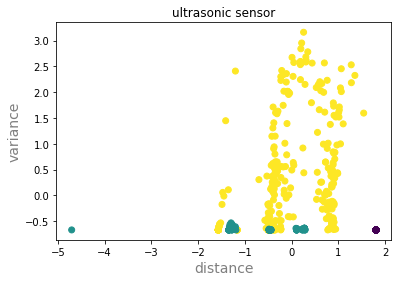

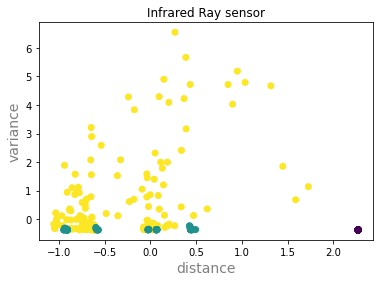

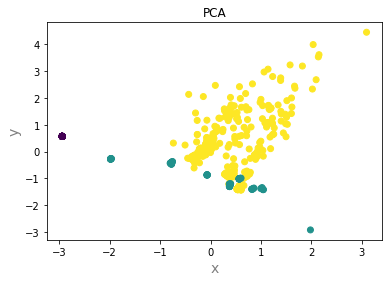

In [8]:
# print (train_data)
scatter(train_data[:,0],train_data[:,2], c=train_label)
title("ultrasonic sensor")
plt.xlabel('distance',fontsize=14,alpha=0.5)
plt.ylabel('variance',fontsize=14,alpha=0.5)
figure()
title("Infrared Ray sensor")
scatter(train_data[:,1],train_data[:,3], c=train_label)
plt.xlabel('distance',fontsize=14,alpha=0.5)
plt.ylabel('variance',fontsize=14,alpha=0.5)

fig = figure()
title("PCA")
scatter(pca_train_data[:,0],pca_train_data[:,1], c=train_label)
plt.xlabel('x',fontsize=14,alpha=0.5)
plt.ylabel('y',fontsize=14,alpha=0.5)


## KMeans

In [9]:
dat_list = []
pca_dat_list = []
lab_list = []
for c in [0,1,2]:
    temp_data = train_data[train_label==c]
    pca_temp_data = pca_train_data[train_label==c]
    k = int(len(temp_data)//10)
    Kmeans_classifier = KMeans(n_clusters=k,random_state=0)
    Kmeans_classifier.fit(temp_data)
    dat_list.extend(Kmeans_classifier.cluster_centers_)
    Kmeans_classifier.fit(pca_temp_data)
    pca_dat_list.extend(Kmeans_classifier.cluster_centers_)
    lab_list.extend([int(c)]*k)
train_mean_data = np.array(dat_list)
pca_train_mean_data = np.array(pca_dat_list)
train_mean_label = np.array(lab_list)


<ipython-input-9-0ff93eb789c9>:9: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  Kmeans_classifier.fit(temp_data)
<ipython-input-9-0ff93eb789c9>:11: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  Kmeans_classifier.fit(pca_temp_data)


Text(0, 0.5, 'variance')

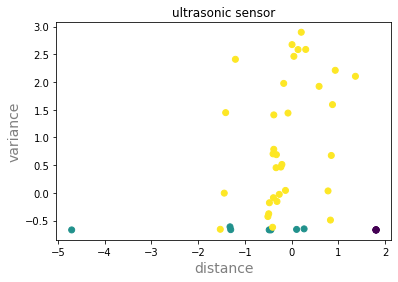

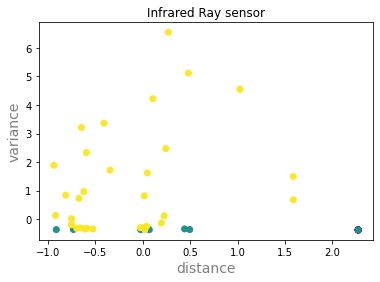

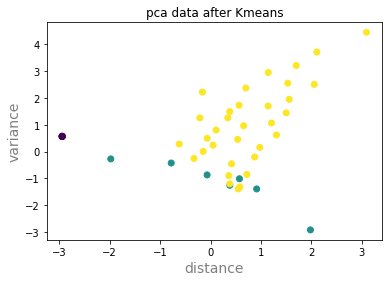

In [10]:
scatter(train_mean_data[:,0],train_mean_data[:,2], c=train_mean_label)
title("ultrasonic sensor")
plt.xlabel('distance',fontsize=14,alpha=0.5)
plt.ylabel('variance',fontsize=14,alpha=0.5)

figure()
title("Infrared Ray sensor")
scatter(train_mean_data[:,1],train_mean_data[:,3], c=train_mean_label)
plt.xlabel('distance',fontsize=14,alpha=0.5)
plt.ylabel('variance',fontsize=14,alpha=0.5)
figure()

title("pca data after Kmeans")
scatter(pca_train_mean_data[:,0],pca_train_mean_data[:,1], c=train_mean_label)
plt.xlabel('distance',fontsize=14,alpha=0.5)
plt.ylabel('variance',fontsize=14,alpha=0.5)

## KNN training

In [11]:
print("KNN accuracy")
for n in range(1,6):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=n)
    classifier.fit(train_data,train_label)
    print("{}_neighbor score: {} ".format(n,classifier.score(test_data,test_label)))
    
print("\nKNN accuracy after Kmeans")
for n in range(1,6):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=n)
    classifier.fit(train_mean_data,train_mean_label)
    print("{}_neighbor score: {} ".format(n,classifier.score(test_data,test_label)))
    
print("\nKNN accuracy after pca")
for n in range(1,6):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=n)
    classifier.fit(pca_train_data,train_label)
    print("{}_neighbor score: {}".format(n,classifier.score(pca_test_data,test_label)))
    
print("\nKNN accuracy after pca and Kmeans")
for n in range(1,6):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=n)
    classifier.fit(pca_train_mean_data,train_mean_label)
    print("{}_neighbor score: {}".format(n,classifier.score(pca_test_data,test_label)))

KNN accuracy
1_neighbor score: 0.8181818181818182 
2_neighbor score: 0.7922077922077922 
3_neighbor score: 0.7922077922077922 
4_neighbor score: 0.7857142857142857 
5_neighbor score: 0.7857142857142857 

KNN accuracy after Kmeans
1_neighbor score: 0.8376623376623377 
2_neighbor score: 0.7207792207792207 
3_neighbor score: 0.8376623376623377 
4_neighbor score: 0.7142857142857143 
5_neighbor score: 0.6818181818181818 

KNN accuracy after pca
1_neighbor score: 0.8116883116883117
2_neighbor score: 0.8051948051948052
3_neighbor score: 0.8116883116883117
4_neighbor score: 0.8051948051948052
5_neighbor score: 0.8051948051948052

KNN accuracy after pca and Kmeans
1_neighbor score: 0.7922077922077922
2_neighbor score: 0.7532467532467533
3_neighbor score: 0.8701298701298701
4_neighbor score: 0.7857142857142857
5_neighbor score: 0.7922077922077922
